In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [77]:
#import data
df = pd.read_csv('weatherHistory.csv')

In [79]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [80]:
df.shape

(96453, 12)

In [90]:
include =['object', 'float', 'int']
df.describe(include=include)

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95143,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000
unique,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,31608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.955182,10.884922,0.735134,10.784588,187.445792,10.382749,1016.811477
std,NaN,9.539222,10.678341,0.195292,6.891979,107.398981,4.186031,7.776105
min,NaN,-21.822222,-27.716667,0.120000,0.000000,0.000000,0.000000,973.780000
25%,NaN,4.744444,2.344444,0.600000,5.812100,116.000000,8.420300,1012.120000
50%,NaN,12.038889,12.038889,0.780000,9.917600,180.000000,10.046400,1016.550000
75%,NaN,18.838889,18.838889,0.890000,14.119700,290.000000,14.908600,1021.160000


In [82]:
df.drop(['Daily Summary','Loud Cover','Formatted Date'], axis = 1 , inplace=True)
list(df.columns.values)

['Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

In [85]:
df.isnull().mean() * 100

Summary                     0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Pressure (millibars)        0.0
dtype: float64

In [ ]:
sns.stripplot(x='Precip Type',y='Temperature (C)',data=df)

In [84]:
#dropping Percip Type
df.drop(['Precip Type'], axis = 1 , inplace=True)

In [ ]:
df.shape

In [89]:
df = df.drop(df[  df['Pressure (millibars)'] == 0   ].index )

In [88]:
df = df.drop(df[  df['Humidity'] == 0   ].index )

In [10]:
df[  df['Pressure (millibars)'] == 0   ].value_counts().count()

0

In [86]:
df[df['Humidity'] == 0].value_counts().count()

22

In [ ]:
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)

In [91]:
df.drop(['Temperature (C)'], axis = 1 , inplace=True)

In [92]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [14]:
df['Summary'].value_counts()

Partly Cloudy                          31608
Mostly Cloudy                          27959
Overcast                               16436
Clear                                  10158
Foggy                                   7042
Breezy and Overcast                      525
Breezy and Mostly Cloudy                 511
Breezy and Partly Cloudy                 379
Dry and Partly Cloudy                     86
Light Rain                                63
Windy and Partly Cloudy                   63
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   34
Dry                                       34
Breezy                                    30
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Humid and Overcast                         7
Windy and 

In [ ]:
df.hist(alpha=1,figsize=(20, 10))

In [ ]:
df.describe()

<AxesSubplot:>

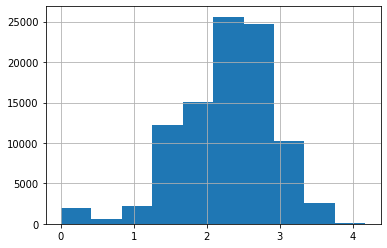

In [94]:
#Do the  trasnformations for required features
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log,validate=True)
df['Wind Speed (km/h)'] = log_transformer.transform(df[['Wind Speed (km/h)']]+1)
df['Wind Speed (km/h)'].hist()

In [96]:
df.isnull().values.any()

False

<AxesSubplot:>

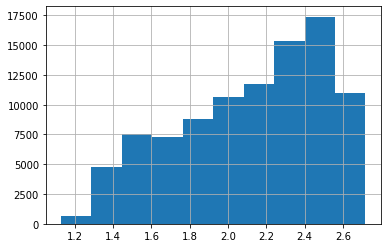

In [95]:
exponential_transformer = FunctionTransformer(np.exp)
df['Humidity'] = exponential_transformer.transform(df['Humidity'])
df['Humidity'].hist()    

In [ ]:
summery_types = ['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain']
# summery_df = pd.DataFrame(summery_types, columns=['Summery_Types'])
# enc = OneHotEncoder(handle_unknown='ignore')
# code_df = enc.fit_transform(summery_df[['Summery_Types']])
# enc_df = pd.DataFrame(enc.fit_transform(summery_df[['Summery_Types']]).toarray())
# summery_df = summery_df.join(enc_df)
# summery_df['Summery_Types'] = summery_df['Summery_Types'].astype('category').cat.codes
# summery_df.dtypes


In [97]:
df['Summary'] = df['Summary'].astype('category').cat.codes
df['Summary'].value_counts()

19    31608
17    27959
18    16436
6     10158
12     7042
4       525
3       511
5       379
11       86
26       63
16       63
25       45
13       40
8        39
2        35
9        34
24       34
0        30
15       17
10       14
20       10
14        7
23        4
1         1
7         1
21        1
22        1
Name: Summary, dtype: int64

In [98]:
df.isnull().sum()

Summary                     0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [36]:
df.shape

(95143, 7)

In [20]:
df['Summary']

0        19
1        19
2        17
3        19
4        17
         ..
96448    19
96449    19
96450    19
96451    19
96452    19
Name: Summary, Length: 95143, dtype: int8

In [22]:
X = df.copy()

In [24]:
X.drop(['Summary'], axis = 1 , inplace=True)

In [25]:
df.shape

(95143, 7)

In [26]:
X.shape

(95143, 6)

In [99]:

list(df.columns.values)


['Summary',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

In [100]:
cols =['Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']
scaler = StandardScaler() 
scaler.fit(X)
X_Scaled = scaler.transform(X)
X_Scaled_Except = pd.DataFrame(X_Scaled, columns=cols)
X_Scaled_Except.head()


,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-0.327397,0.804184,0.660723,0.591761,1.300415,-0.216237
1,-0.342484,0.618167,0.675135,0.666250,1.300415,-0.151938
2,-0.141141,0.804184,-1.033068,0.154138,1.092724,-0.112072
3,-0.462666,0.437647,0.659114,0.759361,1.300415,-0.051630
4,-0.365896,0.437647,0.317152,0.666250,1.300415,-0.038770


In [103]:
merged = X.join(df2)
merged.describe()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary
count,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,93833.000000
mean,10.884922,2.123996,2.278719,187.445792,10.382749,1016.811477,16.092270
std,10.678341,0.386896,0.661823,107.398981,4.186031,7.776105,4.278726
min,-27.716667,1.127497,0.000000,0.000000,0.000000,973.780000,0.000000
25%,2.344444,1.822119,1.918700,116.000000,8.420300,1012.120000,17.000000
50%,12.038889,2.181472,2.390376,180.000000,10.046400,1016.550000,18.000000
75%,18.838889,2.435130,2.715999,290.000000,14.908600,1021.160000,19.000000
max,39.344444,2.718282,4.172117,359.000000,16.100000,1046.380000,26.000000


In [106]:
pca =PCA()
X_pca = pca.fit_transform(merged)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [69]:
dfinal = pd.DataFrame(data=X_pca)
# principleDf =pd.DataFrame(data=, columns=cols)
# principleDf.head()
dfinal.head()

,0,1,2,3,4,5,6
0,-63.565243,1.872629,2.543304,-4.482570,4.673948,-0.120390,-0.377539
1,-71.561728,2.233842,2.097495,-4.532603,4.694189,-0.148566,-0.310229
2,-16.563196,0.370143,1.185309,-2.229577,4.211103,0.881864,-0.189218
3,-81.553200,3.735764,1.774984,-4.710223,4.870814,-0.154176,-0.219332
4,-71.553793,2.913555,1.254335,-2.724272,5.332699,0.035014,-0.194205


In [ ]:
principleDf.hist(alpha=1,figsize=(20, 10))

In [ ]:
pca.explained_variance_ratio_

In [75]:
columns_value = df.feature_names
index = np.argwhere(columns_value == "Summary")
columns_value_new = np.delete(columns_value, index)

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [72]:
df.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary
0,7.388889,2.435130,2.715999,251.0,15.8263,1015.13,19
1,7.227778,2.363161,2.725536,259.0,15.8263,1015.63,19
2,9.377778,2.435130,1.595014,204.0,14.9569,1015.94,17
3,5.944444,2.293319,2.714933,269.0,15.8263,1016.41,19
4,6.977778,2.293319,2.488616,259.0,15.8263,1016.51,17
